# - Regression -

# Example 1  : Bivariate Linear Regression

adopted from [scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [ ]:
# only execute once if necessary
!pip install scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# The coefficients (slope and intercept)
print("Model slope: ", regr.coef_[0])
print('Model intercept: ', regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Model slope:  938.2378612512637
Model intercept:  152.91886182616167
Mean squared error: 2548.07
Coefficient of determination: 0.47


# Example 2 : Multivariate (Multi-dimensional) Linear Regression
adopted and adjusted from this [website](https://satishgunjal.com/multivariate_lr_scikit/)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/multivariate_housing_prices_in_portlans_oregon.csv')
print('Dimension of dataset= ', df.shape)

# To get first n rows from the dataset default value of n is 5
df.head() 

Dimension of dataset=  (47, 3)


,size(in square feet),number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
# get input values from first two columns
X = df.values[:, 0:2]  

# get output values from last coulmn
y = df.values[:, 2]  

# Number of training examples
m = len(y) 
n = X.shape[1]

print('Total no of training examples (m) = %s \n' %(m))
print('Number of input feature (n) = %s \n' %(n))

# Show only first 5 records
for i in range(5):
    print('X =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 47 

Number of input feature (n) = 2 

X = [2104    3] , y = 399900
X = [1600    3] , y = 329900
X = [2400    3] , y = 369000
X = [1416    2] , y = 232000
X = [3000    4] , y = 539900


In [ ]:
# Create object of linear regression [enable normalization]
model_ols =  linear_model.LinearRegression(normalize=True)

# Note the first parameter(feature) is must be 2D array(feature matrix)
model_ols.fit(X,y) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef = ', coef)
print('intercept = ', intercept)

In [ ]:
# Streaming workflow with pipelines
model_ols = make_pipeline(StandardScaler(with_mean=False), linear_model.LinearRegression())
model_ols.fit(X,y) 

In [ ]:
coef = model_ols.named_steps['linearregression'].coef_
intercept = model_ols.named_steps['linearregression'].intercept_
print('coef = ', coef)
print('intercept = ', intercept)

coef =  [109447.79646964  -6578.35485416]
intercept =  89597.90954279737


Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

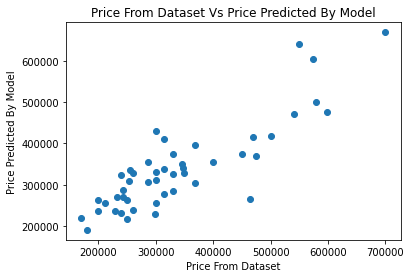

In [ ]:
plt.scatter(y, model_ols.predict(X))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")

In [ ]:
price = model_ols.predict([[2104,    3]])
print('Predicted price of a 1650 sq-ft, 3 br house:', price)

Predicted price of a 1650 sq-ft, 3 br house: [356283.1103389]


# Example 3 : Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [ ]:
np.random.seed(0)

n_samples = 30
degrees = 2

In [ ]:
X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1
print(X)
print(y)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
[-0.76326182 -1.048188   -0.72802435 -0.98523139 -0.40831869 -1.01393114
 -0.31848122 -0.34124811 -0.15490488 -0.19612481 -0.92009534 -0.99462675
 -0.92872678 -0.32784298  1.06752169  1.03712461  0.9567319  -0.73971051
 -0.96998639 -0.71696021 -0.27121531 -0.61626376 -0.61880074 -0.90327739
  0.72337754 -0.91431895  0.61898183 -0.27907117 -0.86558257 -0.3352483 ]


<Figure size 576x360 with 0 Axes>

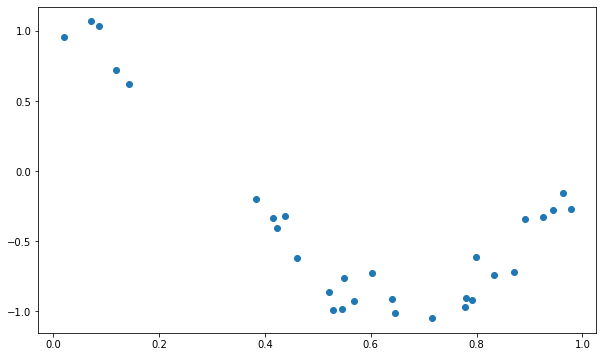

<Figure size 576x360 with 0 Axes>

In [ ]:
plt.plot(X,y,'o')
plt.figure(figsize=(8, 5))

In [ ]:
linear_regression = LinearRegression()
polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)

In [ ]:
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)

In [ ]:
pipeline.fit(X[:, np.newaxis], y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])

In [ ]:
X_test = np.linspace(0, 1, 100)
y_test = pipeline.predict(X_test[:, np.newaxis])
y_true = true_fun(X_test)

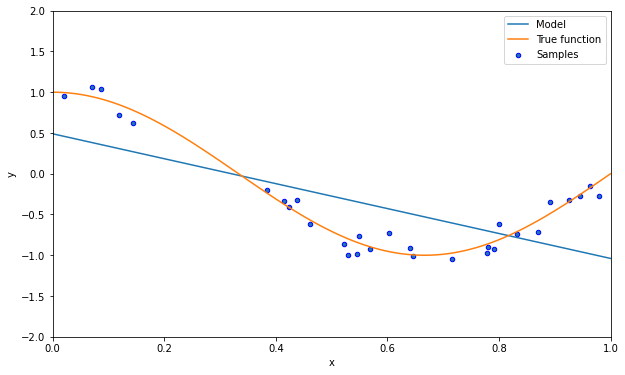

In [ ]:
plt.plot(X_test, y_test, label="Model")
plt.plot(X_test, y_true, label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")

plt.xlabel("x")
plt.ylabel("y")

plt.xlim((0, 1))
plt.ylim((-2, 2))

plt.legend(loc="best")
# plt.title(
#     "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#         degrees[i], -scores.mean(), scores.std()
#     )
# )

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
[-0.76326182 -1.048188   -0.72802435 -0.98523139 -0.40831869 -1.01393114
 -0.31848122 -0.34124811 -0.15490488 -0.19612481 -0.92009534 -0.99462675
 -0.92872678 -0.32784298  1.06752169  1.03712461  0.9567319  -0.73971051
 -0.96998639 -0.71696021 -0.27121531 -0.61626376 -0.61880074 -0.90327739
  0.72337754 -0.91431895  0.61898183 -0.27907117 -0.86558257 -0.3352483 ]


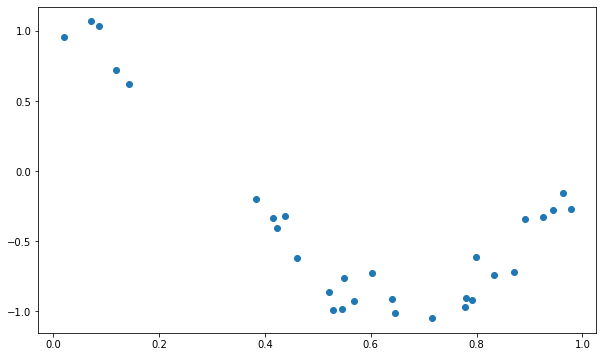

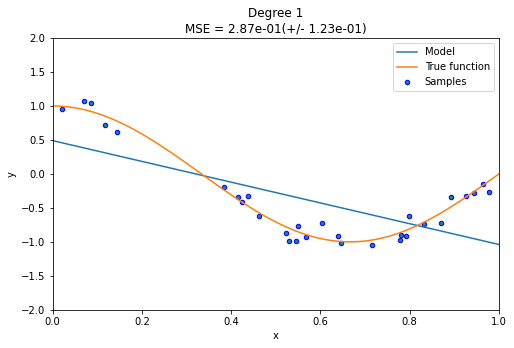

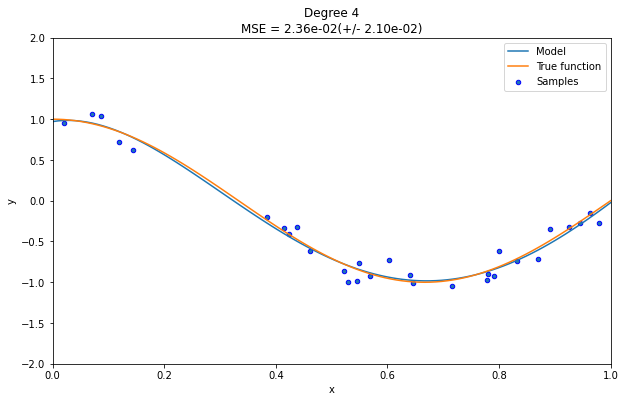

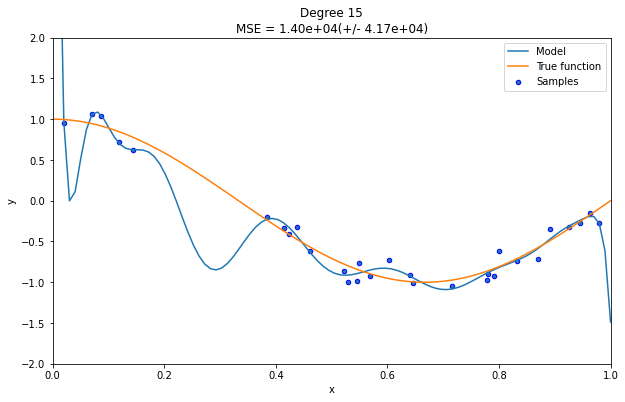

In [ ]:
# quantify relationship between two or more variables (e.g. X vs y)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
# for demonstraing overfit/underfit
degrees = [1, 4, 15]

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.plot(X,y,'o')

plt.figure(figsize=(8, 5))

for i in range(3):

  linear_regression = LinearRegression()
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)

  pipeline = Pipeline(
      [
          ("polynomial_features", polynomial_features),
          ("linear_regression", linear_regression),
      ]
  )
  pipeline.fit(X[:, np.newaxis], y)

  scores = cross_val_score(
      pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
  )

  X_test = np.linspace(0, 1, 100)

  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
  plt.plot(X_test, true_fun(X_test), label="True function")
  plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc="best")
  plt.title(
      "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
          degrees[i], -scores.mean(), scores.std()
      )
  )
  plt.show()
  plt.clf()

# Example 4 : Logistic Regression
dataset from sklearn, code adopted from [here](https://www.educative.io/answers/how-to-implement-logistic-regression-using-the-scikit-learn-kit)

In [ ]:
#Importing the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import f_regression

In [ ]:
# Importing the dataset from the sklearn library into a local variable called dataset
dataset = load_wine()
input_feature = dataset.data
label_class = np.unique(dataset.target)

print(input_feature.shape, label_class)

(178, 13) [0 1 2]


In [ ]:
# Splitting the data test into train 80% and test 20%.
# x_train, y_train are training data and labels respectively 
# x_test, y_test are testing data and labels respectively 
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.20, random_state=15)

In [ ]:
# Making the logistic regression model
logistic_model = LogisticRegression()

# Training the model on the training data and labels
logistic_model.fit(x_train, y_train)

# Using the model to predict the labels of the test data
y_pred = logistic_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy =  0.9444444444444444


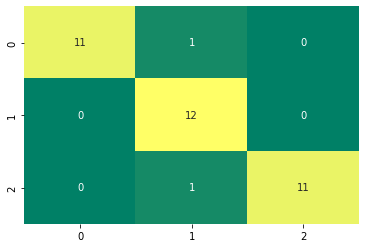

In [ ]:
# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print('accuracy = ', accuracy/100)
confusion_mat_df = pd.DataFrame(confusion_mat, range(confusion_mat.shape[0]), range(confusion_mat.shape[1]))
sns.heatmap(confusion_mat_df, annot = True, cmap = 'summer', cbar = False)
plt.show()

In [ ]:
# Check the p-value and the F-value of the result
f_regression(x_train, y_train)

(array([1.38090421e+01, 3.22370513e+01, 3.99522812e-03, 6.12692554e+01,
        9.40012649e+00, 1.45333904e+02, 3.96044789e+02, 4.73702714e+01,
        3.32154953e+01, 1.17054873e+01, 7.44471497e+01, 2.24324421e+02,
        9.84489047e+01]),
 array([2.91671153e-04, 7.58023417e-08, 9.49691176e-01, 1.10707849e-12,
        2.60443273e-03, 2.11797680e-23, 1.19575258e-42, 1.81132125e-10,
        5.04141116e-08, 8.17092106e-04, 1.22688700e-14, 7.18291142e-31,
        6.71792332e-18]))

# - Clustering -

# Example 1 : K-mean clustering (Simple)
adopted from sklearn

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

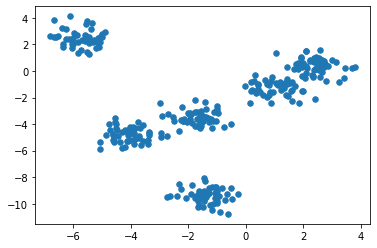

In [ ]:
X, y_true = make_blobs(n_samples=300,
                       centers=6,
                       cluster_std=0.55,
                       random_state=2)
plt.scatter(X[:, 0], X[:, 1], s=30);

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

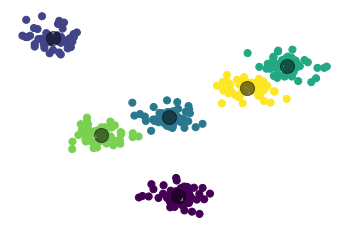

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.axis('off')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Example 2 : K-mean clustering (Iris dataset)
adopted from [here](https://predictivehacks.com/k-means-elbow-method-code-for-python/)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
iris = datasets.load_iris()

df=pd.DataFrame(iris['data'])

print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [ ]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df)
    inertia.append(kmeanModel.inertia_)

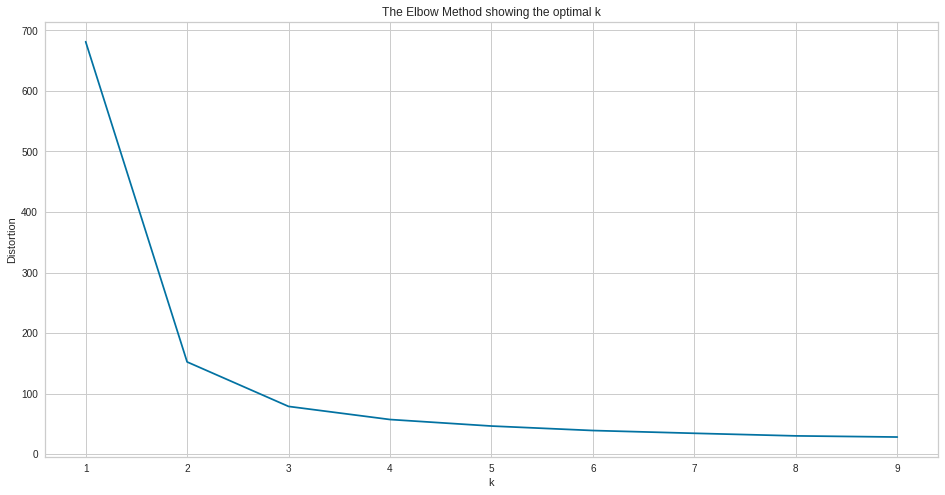

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'K_Means')

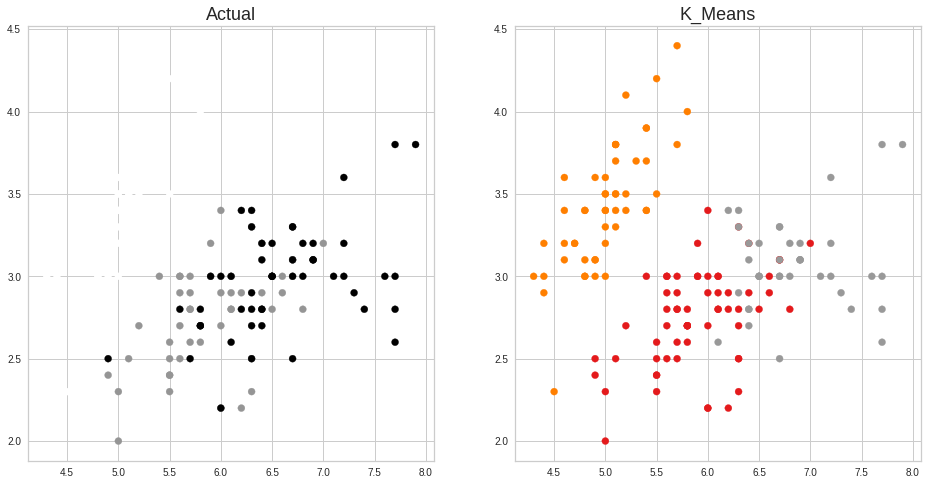

In [ ]:
df['k_means']=kmeanModel.predict(df)
df['target']=iris['target']

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [ ]:
silhouette_score(df.iloc[:,:4], df['k_means'], metric='euclidean')

0.5528190123564095

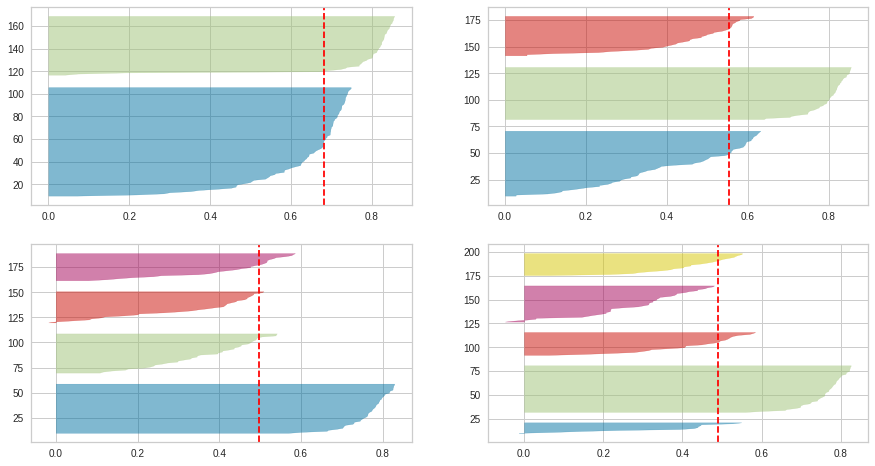

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(iris.data)

# Example 3 : mean shift clustering (Simple example)
adopted from [here](https://www.tutorialspoint.com/machine_learning_with_python/clustering_algorithms_mean_shift_algorithm.htm)

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.datasets import make_blobs
from sklearn.cluster import estimate_bandwidth

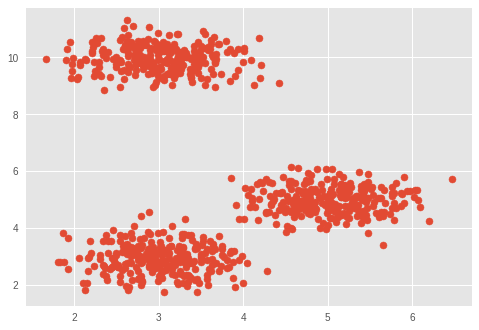

In [ ]:
centers = [[3,3,3],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 800, centers = centers, cluster_std = 0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
bandwidth = estimate_bandwidth(X, quantile=.1,n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)

[[ 5.0646617   4.97485422  5.00824468]
 [ 3.02514262 10.03828079  9.90580145]
 [ 2.98487122  2.89729654  2.94188898]]
Estimated clusters: 3


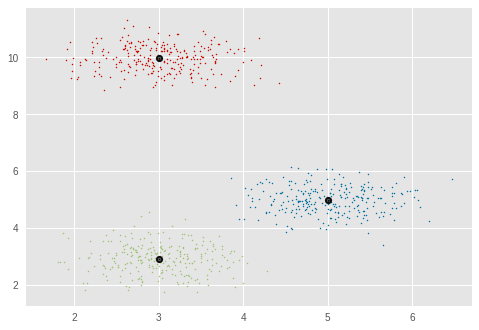

In [ ]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

# Example 4 : Mean Shift Clustering (Image Segmentation)
adopted from [here](https://stackoverflow.com/questions/62575894/how-to-find-clusters-in-image-using-mean-shift-in-python-opencv)


In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.cluster import MeanShift, estimate_bandwidth
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/essc_python_programming/Machine Learning Workshop/ESSCML_workshop_material_release/L02 materials/cat.png'
img = cv.imread(path)

[[[ 23  55  39]
  [ 23  54  39]
  [ 23  54  39]
  ...
  [ 21  29  26]
  [ 21  29  26]
  [ 21  30  26]]

 [[ 18  67  44]
  [ 18  67  45]
  [ 17  66  44]
  ...
  [ 10  29  20]
  [ 11  28  20]
  [ 11  29  19]]

 [[ 26  70  50]
  [ 26  71  49]
  [ 24  69  48]
  ...
  [ 15  32  22]
  [ 16  33  22]
  [ 16  33  22]]

 ...

 [[174 164 160]
  [169 159 158]
  [151 141 144]
  ...
  [124 139 151]
  [119 138 156]
  [119 146 169]]

 [[175 175 179]
  [175 176 179]
  [163 164 168]
  ...
  [108 132 151]
  [116 140 162]
  [119 144 170]]

 [[163 171 178]
  [162 169 176]
  [158 164 170]
  ...
  [121 136 144]
  [147 158 163]
  [147 157 163]]]


Number of segments:  8


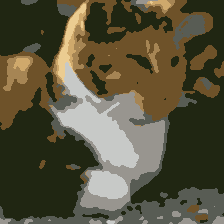

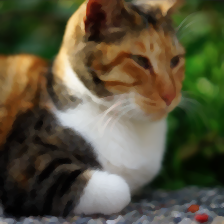

In [ ]:
# filter to reduce noise
img = cv.medianBlur(img, 3)
img = cv.resize(img,(128,128))

# flatten the image
flat_image = img.reshape((-1,3))
flat_image = np.float32(flat_image)

In [ ]:
# meanshift
bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth, max_iter=800, bin_seeding=True)
ms.fit(flat_image)
labeled=ms.labels_

# get number of segments
segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])

In [ ]:
# get the average color of each segment
total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + flat_image[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

# cast the labeled image into the corresponding average color
res = avg[labeled]
result = res.reshape((img.shape))

# show the result
cv2_imshow(result)
cv2_imshow(img)

# Example 5 : DBSCAN

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Silhouette Coefficient: 0.626


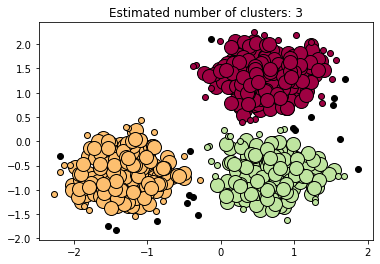

In [ ]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# Example 6 : high dimension data | K-mean vs DBSCAN

datasets extracted from Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
path = '/content/drive/MyDrive/essc_python_programming/Machine Learning Workshop/ESSCML_workshop_material_release/L02 materials/Credit Card Dataset for Clustering [Kaggle]/CC GENERAL.csv'
df = pd.read_csv(path)
df.drop(['CUST_ID'], axis = 1)
df 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X) 

df['MINIMUM_PAYMENTS_NEW'] = X

X2 = df['CREDIT_LIMIT'].values.reshape(-1,1)
X2 = imputer.fit_transform(X2) 

df['CREDIT_LIMIT_NEW'] = X2

df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


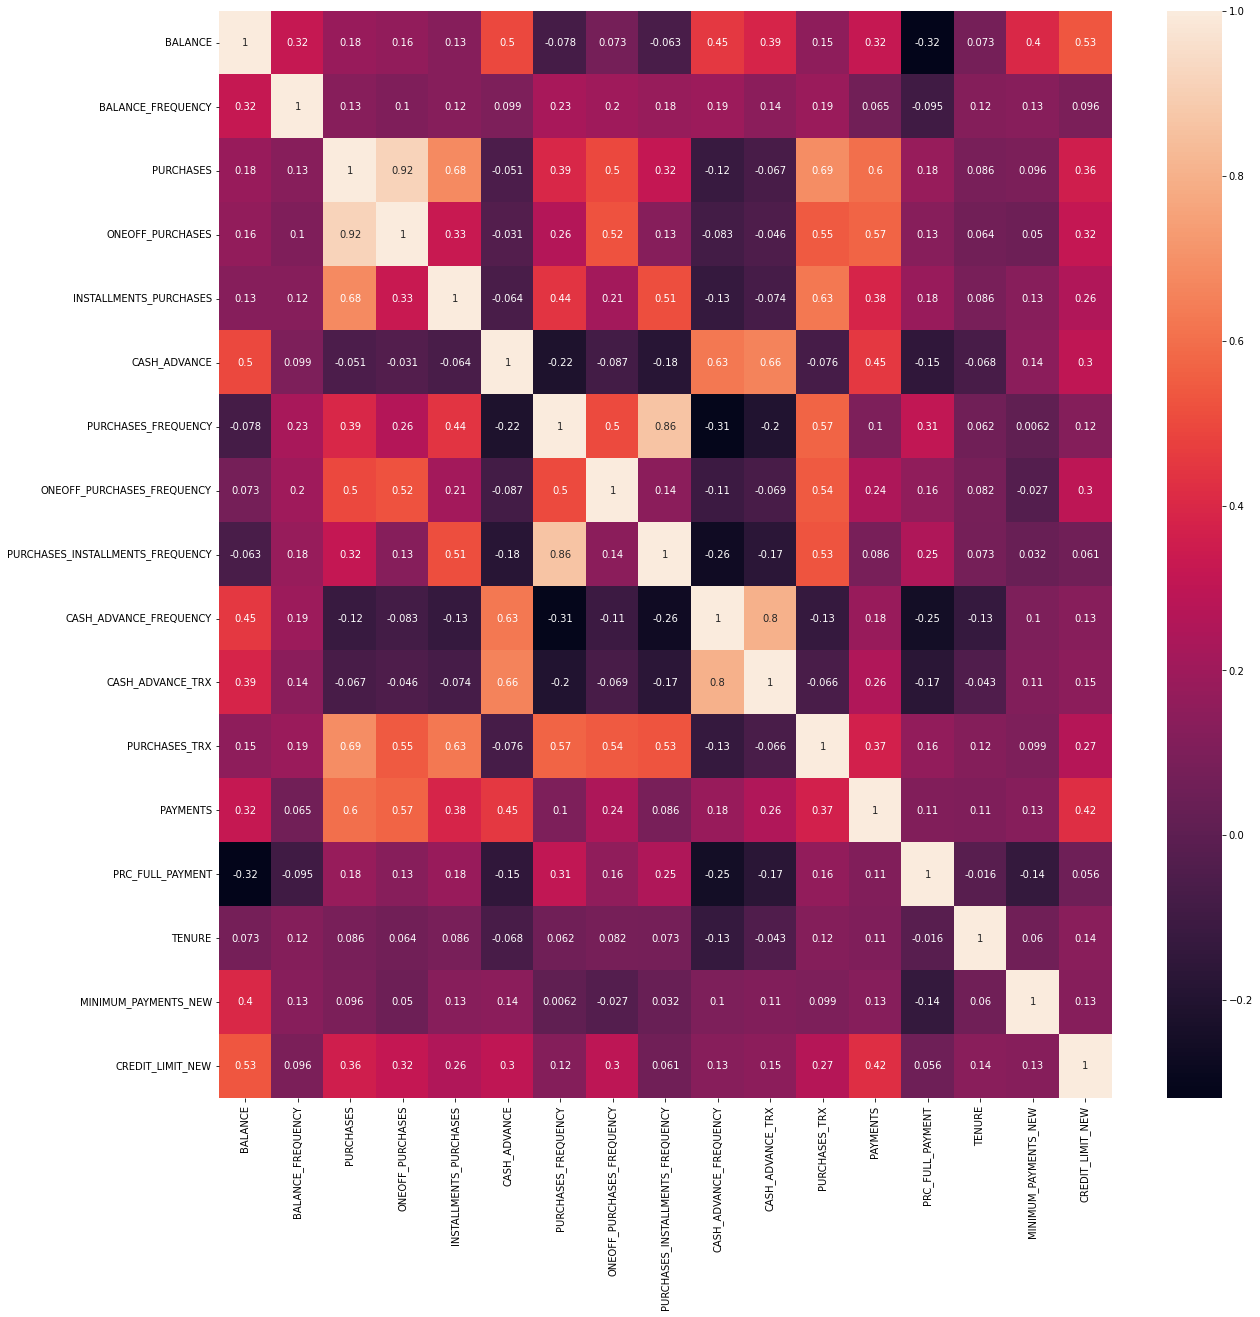

In [ ]:
plt.figure(figsize=(20,20))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

Try :
(1) K-mean clustering with elbow method
(2) DBSCAN 
with all features input into the algorithms

Then try to visualize 'balance' and 'purchase'